#          Import Libraries and Cleaning Data

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [133]:
Data = pd.read_excel('C:\\Users\\Galaxy Computers\\Desktop\\asaa.xlsx');Data.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517


In [134]:
Data.tail()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
55,5,2,158716,158133,59131,92639,165079,0,32027,33282,128269,9287,316849
56,5,3,150784,133069,54224,115746,116442,2559,51235,34421,87708,11354,286412
57,5,4,193534,109639,58378,142382,102687,274,28364,88404,91367,15003,303447
58,5,5,196555,108395,76763,96478,131709,0,37011,109931,50112,12957,304950
59,5,6,192116,121106,107568,121152,103180,18678,27328,108072,56015,10690,331900


In [135]:
Data = Data.dropna()

In [136]:
Data.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [137]:
data = Data.copy()

In [138]:
data = data.drop(["Week of the month (first week, second, third, fourth or fifth week", "Day of the week (Monday to Friday)",
                  "Urgent order","Fiscal sector orders","Orders from the traffic controller sector"], axis=1);data.head(1)

,Non-urgent order,Order type A,Order type B,Order type C,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,316307,61543,175586,302448,44914,188411,14793,539577


<AxesSubplot:>

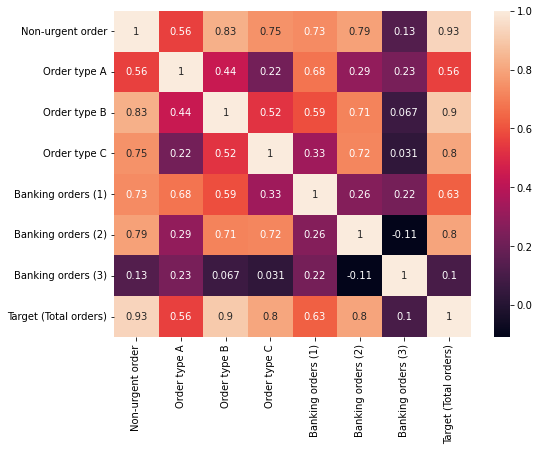

In [139]:
plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True)

# Understanding Data

In [140]:
data = data[['Non-urgent order','Order type A','Order type B','Order type C']]

In [141]:
data.head()

,Non-urgent order,Order type A,Order type B,Order type C
0,316307,61543,175586,302448
1,128633,38058,56037,130580
2,43651,21826,25125,82461
3,171297,41542,113294,162284
4,90532,37679,56618,116220


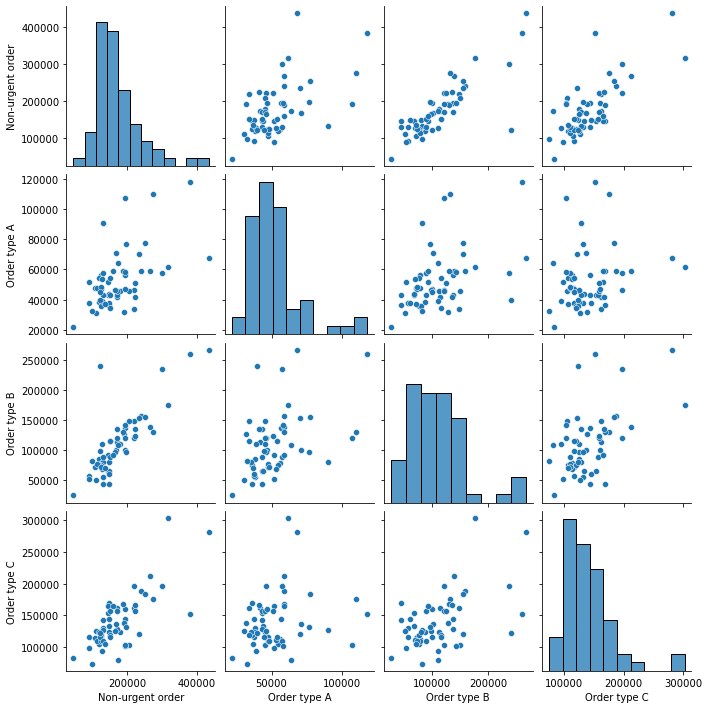

In [142]:
sns.pairplot(data)

# Forecasting Sales by Lineer Regression 

In [143]:
X = data["Order type B"]
X.head()

0    175586
1     56037
2     25125
3    113294
4     56618
Name: Order type B, dtype: int64

In [144]:
y = data["Non-urgent order"];y.head()

0    316307
1    128633
2     43651
3    171297
4     90532
Name: Non-urgent order, dtype: int64

In [145]:
from sklearn.linear_model import LinearRegression


In [146]:
lr = LinearRegression()

In [147]:
y = y.values.reshape(-1,1)

In [153]:
X = X.values.reshape(-1,1)

In [154]:
print(X.shape, y.shape)

(60, 1) (60, 1)


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=100)

In [157]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 1)
(42, 1)
(18, 1)
(18, 1)


In [158]:
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
pd.DataFrame(lr.intercept_, columns=['intersept'])

,intersept
0,62205.043561


In [160]:
pd.DataFrame(lr.coef_)

,0
0,0.980539


In [161]:
y_pred = lr.predict(X_test)

In [162]:
y_pred

array([[127192.21496594],
       [293855.37882213],
       [175492.57672407],
       [216817.3853133 ],
       [189771.18302794],
       [195983.87699451],
       [111922.28391457],
       [142193.4783805 ],
       [180999.2827399 ],
       [213445.31230966],
       [140645.20758295],
       [127284.38561506],
       [133239.19787185],
       [234373.93289404],
       [105311.49118687],
       [153041.17935149],
       [175698.48987638],
       [324344.25290621]])

In [163]:
from sklearn.metrics import r2_score, mean_squared_error

In [164]:
r2 = r2_score(y_test,y_pred);r2

0.7965315435333873

In [165]:
mse = mean_squared_error(y_test,y_pred);mse

1425211746.671294

In [166]:
import math
rmse = math.sqrt(mse);rmse

37751.97672534902

# MINIMIZING SALES BY GRADIENT DESCENT

In [ ]:


def cal_sales (W, X, y):
    
    n = len(y)
    
    tahmin = X.dot(W)
    
    sales = (1/2*n) * np.sum(np.square(tahmin-y))
    
    return sales
    

In [399]:
lr = 0.01

n_iter = 100

W = np.random.randn(2,1)

def gradient_descent(X, y, W, learning_rate=0.01, iterations=100):

    n = len(y)
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations, 2))
    
    for it in range(iterations):
        
        prediction = np.dot(X, W)
        
        W = W - (1/n) * learning_rate * (X.T.dot((prediction - y)))
        
        w_history[it,:] = W.T
        
        cost_history[it] = cal_cost(W, X, y)
    
    return W, cost_history, w_history
    

In [400]:
W = np.random.randn(2,1)
print(W)

[[ 0.60059606]
 [-0.4108209 ]]


In [401]:
lr = 0.01

n_iter = 10



In [402]:
X

array([[175586],
       [ 56037],
       [ 25125],
       [113294],
       [ 56618],
       [ 50704],
       [ 66371],
       [ 85961],
       [148274],
       [ 43306],
       [111036],
       [ 66277],
       [136434],
       [120865],
       [136709],
       [ 78101],
       [ 92272],
       [ 71474],
       [157681],
       [ 80509],
       [ 43962],
       [ 72444],
       [127358],
       [139034],
       [ 75813],
       [ 79997],
       [ 75613],
       [ 59907],
       [236248],
       [ 89382],
       [148718],
       [120548],
       [267342],
       [154242],
       [100544],
       [109062],
       [260632],
       [124660],
       [ 99892],
       [131165],
       [154863],
       [ 96870],
       [ 69150],
       [ 77610],
       [ 72826],
       [130098],
       [ 99072],
       [110740],
       [240922],
       [ 88462],
       [135189],
       [115536],
       [ 81576],
       [ 51930],
       [ 71353],
       [ 92639],
       [115746],
       [142382],
       [ 96478

In [403]:
n = len(X)

X_b = np.c_[np.ones((n,1)), X]
                
print(X_b)

[[1.00000e+00 1.75586e+05]
 [1.00000e+00 5.60370e+04]
 [1.00000e+00 2.51250e+04]
 [1.00000e+00 1.13294e+05]
 [1.00000e+00 5.66180e+04]
 [1.00000e+00 5.07040e+04]
 [1.00000e+00 6.63710e+04]
 [1.00000e+00 8.59610e+04]
 [1.00000e+00 1.48274e+05]
 [1.00000e+00 4.33060e+04]
 [1.00000e+00 1.11036e+05]
 [1.00000e+00 6.62770e+04]
 [1.00000e+00 1.36434e+05]
 [1.00000e+00 1.20865e+05]
 [1.00000e+00 1.36709e+05]
 [1.00000e+00 7.81010e+04]
 [1.00000e+00 9.22720e+04]
 [1.00000e+00 7.14740e+04]
 [1.00000e+00 1.57681e+05]
 [1.00000e+00 8.05090e+04]
 [1.00000e+00 4.39620e+04]
 [1.00000e+00 7.24440e+04]
 [1.00000e+00 1.27358e+05]
 [1.00000e+00 1.39034e+05]
 [1.00000e+00 7.58130e+04]
 [1.00000e+00 7.99970e+04]
 [1.00000e+00 7.56130e+04]
 [1.00000e+00 5.99070e+04]
 [1.00000e+00 2.36248e+05]
 [1.00000e+00 8.93820e+04]
 [1.00000e+00 1.48718e+05]
 [1.00000e+00 1.20548e+05]
 [1.00000e+00 2.67342e+05]
 [1.00000e+00 1.54242e+05]
 [1.00000e+00 1.00544e+05]
 [1.00000e+00 1.09062e+05]
 [1.00000e+00 2.60632e+05]
 

In [404]:
W_final, cost_history, w_history = gradient_descent(X_b, y, W, lr, n_iter)

In [405]:
print('W final:', W_final)

W final: [[-5.78390978e+76]
 [-7.65837576e+81]]


In [406]:
print('Sales History:', cost_history)

Sales History: [1.99152346e+030 4.16580003e+046 8.71387668e+062 1.82273864e+079
 3.81274176e+095 7.97536159e+111 1.66825860e+128 3.48960576e+144
 7.29943685e+160 1.52687100e+177]


In [407]:
print('Initial Sales :', cost_history[0])
print('Final Sales:', cost_history[-1])

Initial Sales : 1.9915234630796165e+30
Final Sales: 1.526871000635402e+177


In [408]:
W_0 = W[0]
print('W_0:', W_0)

W_0_final = W_final[0]
print('W_0_final:', W_0_final)

W_0: [0.60059606]
W_0_final: [-5.78390978e+76]


In [409]:
W_1 = W[1]
print('W_1:', W_1)

W_1_final = W_final[1]
print('W_1_final:', W_1_final)

W_1: [-0.4108209]
W_1_final: [-7.65837576e+81]


In [410]:
def cost_vs_iterations(cost_history, n_iter):
    
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(range(n_iter), cost_history)

    plt.xlabel('Iterations')
    plt.ylabel('J(W)')
    plt.title('TV - Sales')
    plt.grid()
    plt.show()

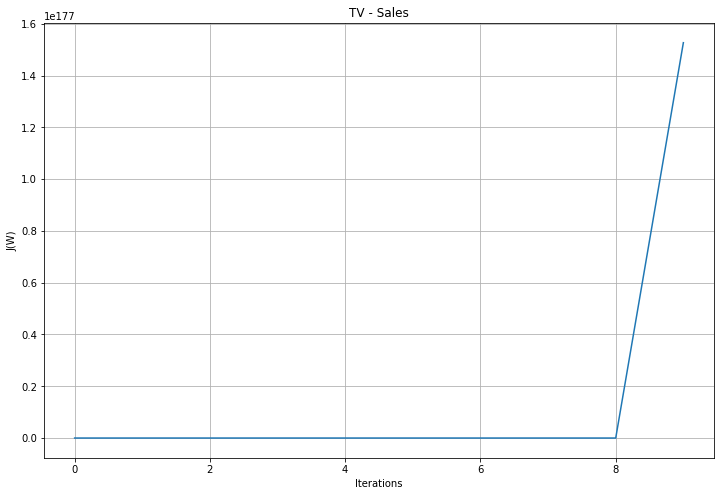

In [411]:
cost_vs_iterations(cost_history, n_iter)